In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [275]:
from pandasql import sqldf
pysqldf = lambda q:sqldf(q, globals())

things i want to find out
1. which gneres make the most money
2. which release dates make the most money
3. how much to spend on a movie
4. which directors/actors to use
5. which rating is best
6. how long it should be
7. which day is best
8. how long they should film for
for all aspects above we care about return on investment 
random ones
9. weather on release day
10. percentrage gdp growth on release year
11. global unemployment levels 

plan of action
1. re-read all notes tonight 
2. figure out how to connect data sets to get what i want and which ones to use 
3. connect them

1. DONE
2. 1)


In [276]:
df1 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
display(df1.head())
display(df1.info())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

In [277]:
df2 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
display(df2.head())
display(df2.info())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

In [278]:
df3 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
display(df3.head())
display(df3.info())

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


None

Cleaning Data

starting with df2
1. drop start_year, original_title
2. change primary title to movie_title
3. de capitalize all movie titles
4. de capitalize call genres (may have to do this later)
3. make runtime_minutes into int64

after join (get rid of duplicated an nan rows)

In [279]:
df2 = df2.drop(['original_title', 'start_year'], axis =1)

In [280]:
df2 = df2.rename(columns={'primary_title' : 'movie_title'})

In [281]:
df2['movie_title'] = df2['movie_title'].apply(lambda x: x.lower())

In [282]:
df2['genres'] = df2['genres'].str.lower()

In [283]:
df2.head()

,tconst,movie_title,runtime_minutes,genres
0,tt0063540,sunghursh,175.0,"action,crime,drama"
1,tt0066787,one day before the rainy season,114.0,"biography,drama"
2,tt0069049,the other side of the wind,122.0,drama
3,tt0069204,sabse bada sukh,NaN,"comedy,drama"
4,tt0100275,the wandering soap opera,80.0,"comedy,drama,fantasy"


moving to df3
1. Join df2 and df3 to make df4
2. check for duplicate rows
3. get rid of rows with a missing value

In [284]:
q4 = """ SELECT * 
         FROM df2
         JOIN df3
         USING (tconst)"""
df4 = pysqldf(q4)

In [285]:
df4.head()

,tconst,movie_title,runtime_minutes,genres,directors,writers
0,tt0063540,sunghursh,175.0,"action,crime,drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,one day before the rainy season,114.0,"biography,drama",nm0002411,None
2,tt0069049,the other side of the wind,122.0,drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,sabse bada sukh,NaN,"comedy,drama",nm0611531,nm0347899
4,tt0100275,the wandering soap opera,80.0,"comedy,drama,fantasy","nm0765384,nm0749914","nm1360635,nm0749914"


In [286]:
df4[df4.duplicated()] #okay so no duplicates thats good

,tconst,movie_title,runtime_minutes,genres,directors,writers


In [287]:
df4[df4.duplicated(subset='tconst')] #being extra careful to confirm

,tconst,movie_title,runtime_minutes,genres,directors,writers


In [288]:
df4.isna().sum() #runtime is more important that writers - lets delete all rows where runtime is 
                 #actually lets deal with missing values after we join with df1

tconst                 0
movie_title            0
runtime_minutes    31739
genres              5408
directors           5727
writers            35883
dtype: int64

moving to df1
1. format release data
2. Add day of the week column
3. Add month column
2. format the money columns
3. rename movie columns
4. make ROI column

In [289]:
df1['release_date'] = pd.to_datetime(df1['release_date'])
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [290]:
df1['movie'] = df1['movie'].str.lower()

In [291]:
df1['release_day'] = df1['release_date'].dt.day_name()

In [292]:
df1['release_month'] = df1['release_date'].dt.month_name()

In [293]:
df1['release_year'] = pd.DatetimeIndex(df1['release_date']).year

In [294]:
df1['production_budget'] = df1['production_budget'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)
df1['domestic_gross'] = df1['domestic_gross'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)
df1['worldwide_gross'] = df1['worldwide_gross'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)

In [295]:
df1.head() #everything is in order to far

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_day,release_month,release_year
0,1,2009-12-18,avatar,425000000,760507625,2776345279,Friday,December,2009
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,Friday,May,2011
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,Friday,June,2019
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,Friday,May,2015
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747,Friday,December,2017


In [296]:
df1['revenue'] = df1['worldwide_gross'] + df1['domestic_gross']

In [297]:
df1['profit'] = (df1['revenue'] - df1['production_budget'])

In [298]:
df1['roi'] = df1['profit']/df1['production_budget']

In [299]:
df1 = df1.drop(['domestic_gross', 'worldwide_gross'], axis = 1)

In [300]:
df1 = df1.rename(columns={'movie' : 'movie_title'})

In [301]:
df1.head()

,id,release_date,movie_title,production_budget,release_day,release_month,release_year,revenue,profit,roi
0,1,2009-12-18,avatar,425000000,Friday,December,2009,3536852904,3111852904,7.322007
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,Friday,May,2011,1286727750,876127750,2.133774
2,3,2019-06-07,dark phoenix,350000000,Friday,June,2019,192524700,-157475300,-0.449929
3,4,2015-05-01,avengers: age of ultron,330600000,Friday,May,2015,1862019831,1531419831,4.632244
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,Friday,December,2017,1936903129,1619903129,5.110105


1. Join df4 with df1 using movie_title to make df5
2. check for duplicates
3. treat missing values

In [302]:
q5 = """SELECT * 
        FROM df4
        JOIN df1
        USING (movie_title);"""
df5 = pysqldf(q5)

In [303]:
df5.head()

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi
0,tt0249516,foodfight!,91.0,"action,animation,comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",26,2012-12-31 00:00:00.000000,45000000,Monday,December,2012,73706,-44926294,-0.998362
1,tt0293429,mortal kombat,NaN,"action,adventure,fantasy",nm2585406,nm3859643,10,1995-08-18 00:00:00.000000,20000000,Friday,August,1995,192566454,172566454,8.628323
2,tt0326592,the overnight,88.0,None,nm1208371,"nm1170333,nm1208371",21,2015-06-19 00:00:00.000000,200000,Friday,June,2015,2275804,2075804,10.379020
3,tt0337692,on the road,124.0,"adventure,drama,romance",nm0758574,"nm0449616,nm1433580",17,2013-03-22 00:00:00.000000,25000000,Friday,March,2013,10034130,-14965870,-0.598635
4,tt0359950,the secret life of walter mitty,114.0,"adventure,comedy,drama",nm0001774,"nm0175726,nm0862122",37,2013-12-25 00:00:00.000000,91000000,Wednesday,December,2013,246098021,155098021,1.704374


In [304]:
len(df5)

3891

#3815 is less than i thought i am going to de capitalize all movie titles in df1 and df4
#nothing changed

In [305]:
df5[df5.duplicated()] #okay so no duplicates thats good

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi


In [306]:
df5.isna().sum() #so i need to keep all genres, diretors and runtime so i will deal with those firse
                 #if there are still a lot of blank writers then i may have to delete the column

tconst                 0
movie_title            0
runtime_minutes      494
genres                73
directors             90
writers              473
id                     0
release_date           0
production_budget      0
release_day            0
release_month          0
release_year           0
revenue                0
profit                 0
roi                    0
dtype: int64

In [307]:
df5 = df5.dropna(subset =['runtime_minutes'])

In [308]:
df5.isna().sum() #okay as a result we decide to drop all rows with empty data

tconst                 0
movie_title            0
runtime_minutes        0
genres                19
directors             39
writers              334
id                     0
release_date           0
production_budget      0
release_day            0
release_month          0
release_year           0
revenue                0
profit                 0
roi                    0
dtype: int64

In [309]:
df5 = df5.dropna(subset =['runtime_minutes', 'genres', 'directors', 'writers'])
df5.isna().sum() #perfect

tconst               0
movie_title          0
runtime_minutes      0
genres               0
directors            0
writers              0
id                   0
release_date         0
production_budget    0
release_day          0
release_month        0
release_year         0
revenue              0
profit               0
roi                  0
dtype: int64

In [310]:
df5.head()

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi
0,tt0249516,foodfight!,91.0,"action,animation,comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",26,2012-12-31 00:00:00.000000,45000000,Monday,December,2012,73706,-44926294,-0.998362
3,tt0337692,on the road,124.0,"adventure,drama,romance",nm0758574,"nm0449616,nm1433580",17,2013-03-22 00:00:00.000000,25000000,Friday,March,2013,10034130,-14965870,-0.598635
4,tt0359950,the secret life of walter mitty,114.0,"adventure,comedy,drama",nm0001774,"nm0175726,nm0862122",37,2013-12-25 00:00:00.000000,91000000,Wednesday,December,2013,246098021,155098021,1.704374
5,tt0365907,a walk among the tombstones,114.0,"action,crime,drama",nm0291082,"nm0088747,nm0291082",67,2014-09-19 00:00:00.000000,28000000,Friday,September,2014,88126272,60126272,2.147367
6,tt0369610,jurassic world,124.0,"action,adventure,sci-fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",34,2015-06-12 00:00:00.000000,215000000,Friday,June,2015,2301125489,2086125489,9.702909


okay so now we have our fully cleaned data table we can now start our data exploration

plots

1. budget to ROI
2. runtime to ROI
3. directors to ROI
4. Writers to ROI
5. release day to ROI
6. release month to ROI
7. genres to ROI 
8. unemployment/gdp on ROI

easy
1. budget to ROI
2. runtime to ROI
5. release day to ROI
6. release month to ROI

hard
3. directors to ROI
4. Writers to ROI
7. genres to ROI 

different ones
8. unemployment/gdp on ROI -> maybe GDP gives 

lets start with one of the easy ones before attempting the hard ones

1. Burget to ROI

In [402]:
df5.describe()

,runtime_minutes,id,production_budget,release_year,revenue,profit,roi
count,3046.000000,3046.000000,3.046000e+03,3046.000000,3.046000e+03,3.046000e+03,3046.000000
mean,100.249508,51.060735,3.404807e+07,2009.941563,1.418934e+08,1.078453e+08,4.945742
std,24.515954,28.561815,4.712946e+07,9.581208,2.700954e+08,2.359704e+08,20.517901
min,1.000000,1.000000,1.400000e+03,1915.000000,0.000000e+00,-1.574753e+08,-1.000000
25%,89.000000,27.250000,5.000000e+06,2010.000000,3.372858e+06,-1.000000e+06,-0.538875
50%,100.000000,51.000000,1.665000e+07,2013.000000,4.495364e+07,2.467459e+07,1.299430
75%,113.000000,76.000000,4.000000e+07,2015.000000,1.483302e+08,1.080977e+08,4.444638
max,360.000000,100.000000,4.250000e+08,2019.000000,3.536853e+09,3.111853e+09,643.208840


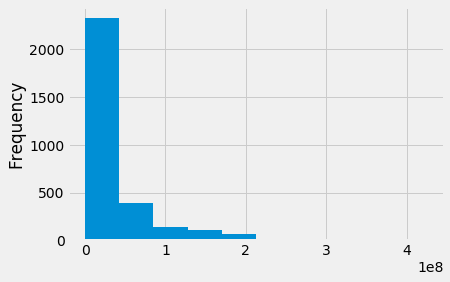

In [311]:
with plt.style.context('fivethirtyeight'):
    df5['production_budget'].plot.hist()

(-1.5, 60)

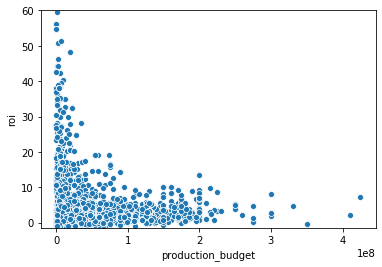

In [410]:
ax = sns.scatterplot(x="production_budget", y="roi", data=df5, cmap="coolwarm")
ax.set_ylim(-1.5, 60)

In [456]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

Text(0, 0.5, 'Return On Investment (In Billions Of U.S. Dollars) ')

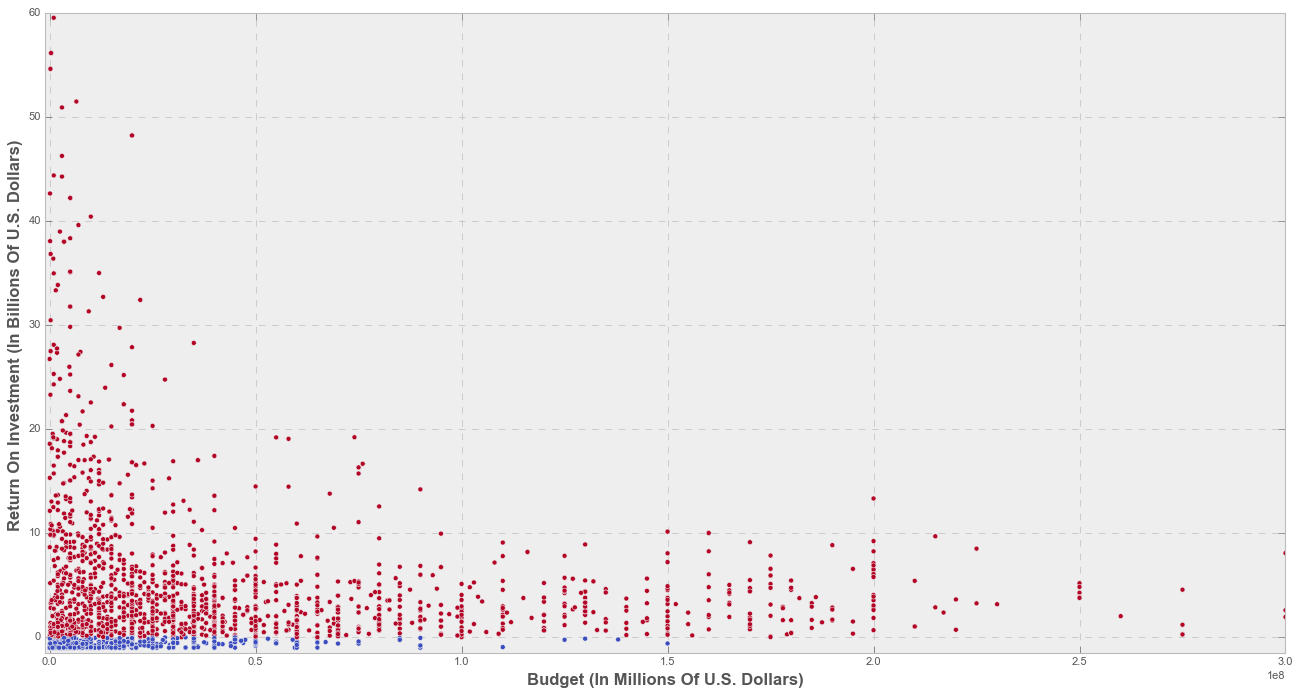

In [475]:
plt.style.use('bmh')
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.scatter(x=df5["production_budget"], y=df5["roi"], c=np.sign(df5["roi"]), cmap="coolwarm")
ax.set_ylim(-1.5, 60)
ax.set_xlim(-1000000, 300000000)
plt.xlabel('Budget (In Millions Of U.S. Dollars)', fontsize = 15 , weight ='bold')
plt.ylabel('Return On Investment (In Billions Of U.S. Dollars) ', fontsize = 15, weight ='bold')

In [313]:
(df5.loc[df5['roi']>100]) # most movies which generate insane ROI's are old so lets filter for new movies

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi
679,tt1502407,halloween,106.0,"horror,thriller",nm0337773,"nm0000118,nm0384185,nm2171769,nm1144419,nm0337773",37,1978-10-17 00:00:00.000000,325000,Tuesday,October,1978,117000000,116675000,359.000000
741,tt1560985,the devil inside,83.0,horror,nm0068587,"nm0068587,nm1834343",12,2012-01-06 00:00:00.000000,1000000,Friday,January,2012,155022435,154022435,154.022435
782,tt1591095,insidious,103.0,"horror,mystery,thriller",nm1490123,nm1191481,63,2011-04-01 00:00:00.000000,1500000,Friday,April,2011,153880036,152380036,101.586691
903,tt1661199,cinderella,105.0,"drama,family,fantasy",nm0000110,"nm0919363,nm0674518",76,1950-02-15 00:00:00.000000,2900000,Wednesday,February,1950,348591415,345691415,119.203936
1104,tt1799516,benji,87.0,"crime,drama,family",nm0131969,"nm0131969,nm0131995",30,1974-11-15 00:00:00.000000,500000,Friday,November,1974,63119120,62619120,125.238240
1673,tt2309260,the gallows,81.0,"horror,mystery,thriller","nm4000389,nm3951039","nm3951039,nm4000389",80,2015-07-10 00:00:00.000000,100000,Friday,July,2015,64420884,64320884,643.208840
1885,tt2519480,benji,79.0,"documentary,sport","nm1962885,nm1964238",nm1243211,30,1974-11-15 00:00:00.000000,500000,Friday,November,1974,63119120,62619120,125.238240
1972,tt2668120,bambi,58.0,"biography,documentary",nm0509852,nm0509852,47,1942-08-13 00:00:00.000000,858000,Thursday,August,1942,370797000,369939000,431.164336
2298,tt3393372,night of the living dead,79.0,horror,nm5209991,nm5209991,77,1968-10-01 00:00:00.000000,114000,Tuesday,October,1968,42174128,42060128,368.948491
2639,tt4196450,the birth of a nation,120.0,"biography,drama,history",nm1676649,"nm1676649,nm7473774",78,1915-02-08 00:00:00.000000,110000,Monday,February,1915,21000000,20890000,189.909091


In [314]:
df5_new_movies = df5.loc[df5['release_year']>1999]

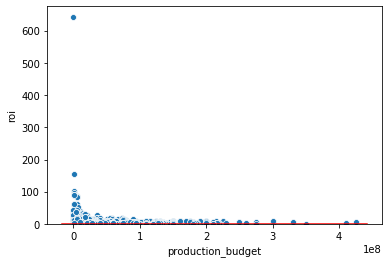

In [315]:
ax = sns.scatterplot(x="production_budget", y="roi", data=df5_new_movies) #so dont spend too much on your movie
ax2 = sns.distplot(df5['production_budget'], hist= False, color = 'r')

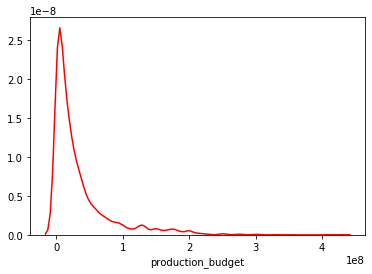

In [316]:
ax2 = sns.distplot(df5['production_budget'], hist= False, color = 'r' )

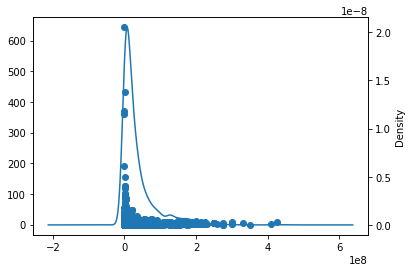

In [317]:
fig,ax = plt.subplots()
ax.scatter(x="production_budget", y="roi", data = df5)
ax2=ax.twinx()
ax2 = df5['production_budget'].plot.kde()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(gapminder_us.year, gapminder_us.lifeExp, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)a
# set y-axis label
ax.set_ylabel("lifeExp",color="red",fontsize=14)
Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gapminder_us.year, gapminder_us["gdpPercap"],color="blue",marker="o")
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Runtime

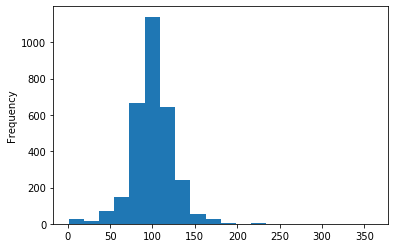

In [381]:
df5['runtime_minutes'].plot.hist(bins = 20)

(0, 250)

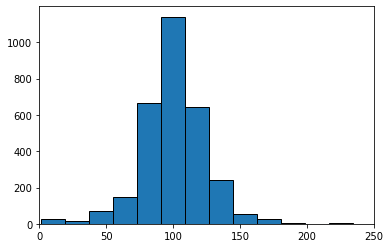

In [390]:
plt.hist((df5['runtime_minutes']), bins = 20z, edgecolor = 'black')
plt.xlim(0, 250)

release month

In [319]:
release_month_df = df5[['release_month', 'roi']]

In [320]:
release_month_df_grouped = release_month_df.groupby(['release_month'], as_index=False).mean().sort_values(by=['roi'])
release_month_df_grouped.head()

,release_month,roi
2,December,2.346121
7,March,2.958741
11,September,3.043325
8,May,3.169553
6,June,3.533801


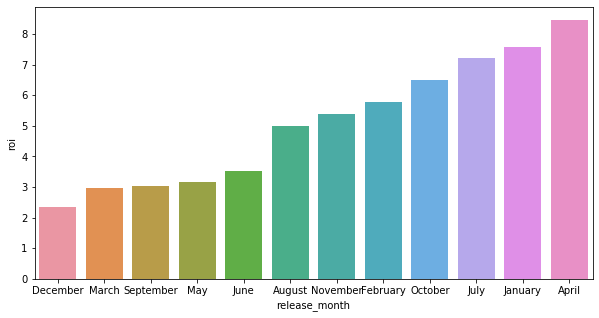

In [391]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax = sns.barplot(x="release_month", y="roi", data=release_month_df_grouped)

Release Week

In [393]:
df5.head()

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi
0,tt0249516,foodfight!,91.0,"action,animation,comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",26,2012-12-31 00:00:00.000000,45000000,Monday,December,2012,73706,-44926294,-0.998362
3,tt0337692,on the road,124.0,"adventure,drama,romance",nm0758574,"nm0449616,nm1433580",17,2013-03-22 00:00:00.000000,25000000,Friday,March,2013,10034130,-14965870,-0.598635
4,tt0359950,the secret life of walter mitty,114.0,"adventure,comedy,drama",nm0001774,"nm0175726,nm0862122",37,2013-12-25 00:00:00.000000,91000000,Wednesday,December,2013,246098021,155098021,1.704374
5,tt0365907,a walk among the tombstones,114.0,"action,crime,drama",nm0291082,"nm0088747,nm0291082",67,2014-09-19 00:00:00.000000,28000000,Friday,September,2014,88126272,60126272,2.147367
6,tt0369610,jurassic world,124.0,"action,adventure,sci-fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",34,2015-06-12 00:00:00.000000,215000000,Friday,June,2015,2301125489,2086125489,9.702909


In [398]:
release_week_df = df5[['release_day', 'roi', 'revenue']]

In [399]:
release_day_df_grouped = release_week_df.groupby(['release_day'], as_index=False).mean().sort_values(by=['roi'])
release_day_df_grouped.head()

,release_day,roi,revenue
2,Saturday,0.346472,2.943896e+07
0,Friday,4.273476,1.493764e+08
5,Tuesday,4.467681,2.732661e+07
1,Monday,5.833962,1.329007e+07
6,Wednesday,5.959717,1.840018e+08


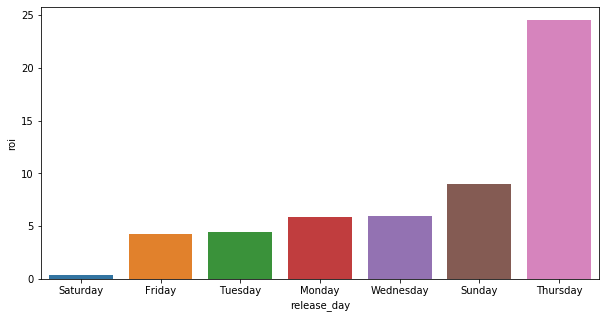

In [400]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax = sns.barplot(x="release_day", y="roi", data=release_day_df_grouped)

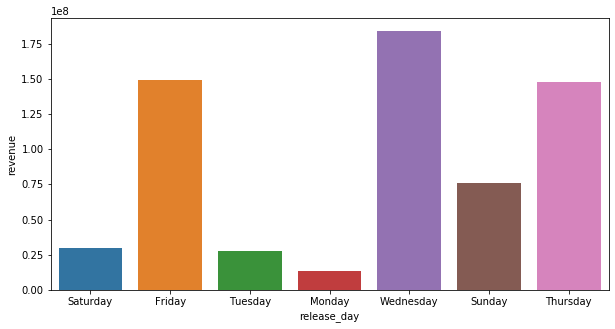

In [401]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax = sns.barplot(x="release_day", y="revenue", data=release_day_df_grouped)

GDP on ROI

In [322]:
df_excel_gdp = pd.read_excel('zippedData/mod1_finalproject_worldgdpgrowth.xlsx')
df_excel_gdp.head()

,release_year,world_gdp_growth
0,1980,1.904
1,1981,1.923
2,1982,0.431
3,1983,2.412
4,1984,4.506


In [323]:
df_gross_stats = df5[['release_year', 'revenue','profit', 'roi', 'production_budget']]
df_gross_stats.head()

,release_year,revenue,profit,roi,production_budget
0,2012,73706,-44926294,-0.998362,45000000
3,2013,10034130,-14965870,-0.598635,25000000
4,2013,246098021,155098021,1.704374,91000000
5,2014,88126272,60126272,2.147367,28000000
6,2015,2301125489,2086125489,9.702909,215000000


In [324]:
df_gross_stats_grouped = df_gross_stats.groupby(['release_year'], as_index=False).mean().sort_values(by=['release_year'])
df_gross_stats_grouped.head()

,release_year,revenue,profit,roi,production_budget
0,1915,21000000.0,20890000.0,189.909091,110000.0
1,1927,0.0,-2000000.0,-1.000000,2000000.0
2,1940,128960592.5,126923969.0,56.425918,2036623.5
3,1942,370797000.0,369939000.0,431.164336,858000.0
4,1944,4000000.0,-1200000.0,-0.230769,5200000.0


In [325]:
df_gross_stats_grouped = df_gross_stats_grouped.loc[(df_gross_stats_grouped['release_year']>1979) & (df_gross_stats_grouped['release_year']<2015) ]

In [326]:
qgdp = """ SELECT * 
         FROM df_gross_stats_grouped
         JOIN df_excel_gdp
         USING (release_year)"""
df_gdp = pysqldf(qgdp)

In [327]:
df_gdp.head()

,release_year,revenue,profit,roi,production_budget,world_gdp_growth
0,1980,3.089214e+07,1.478214e+07,12.946811,16110000.0,1.904
1,1981,6.116128e+07,4.816128e+07,9.068278,13000000.0,1.923
2,1982,7.870255e+07,7.042755e+07,5.268793,8275000.0,0.431
3,1983,2.875329e+07,1.882829e+07,2.217587,9925000.0,2.412
4,1984,1.881210e+08,1.784110e+08,20.526439,9710000.0,4.506


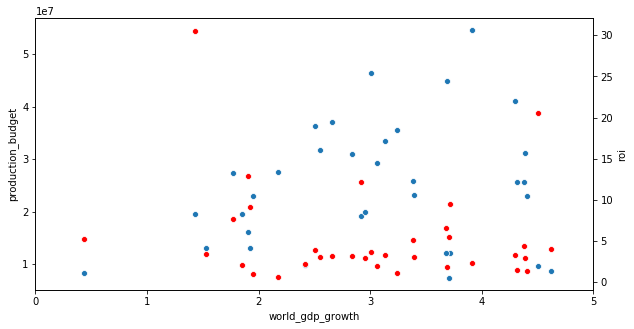

In [328]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax = sns.scatterplot(x="world_gdp_growth", y="production_budget", data=df_gdp)
ax.set_xlim(0, 5)
ax2=ax.twinx()
ax2 = sns.scatterplot(x="world_gdp_growth", y="roi", data=df_gdp, color = 'red')


genres

In [434]:
test.columns = ['genres1', 'genres2', 'genres3']

ValueError: Length mismatch: Expected axis has 26 elements, new values have 3 elements

In [435]:
test = df5[['genres']]
test = test.genres.str.split(',', expand = True)
test.columns = ['genres1', 'genres2', 'genres3']
test.head(5)

,genres1,genres2,genres3
0,action,animation,comedy
3,adventure,drama,romance
4,adventure,comedy,drama
5,action,crime,drama
6,action,adventure,sci-fi


In [436]:
allgenres = list(df5.genres.unique())
def listtostring(s):
    string = ""
    for e in s:
        string += e
        string += ','
    return string

In [437]:
allgenres_nocommas = listtostring(allgenres).replace(',',' ')
uniquegenres = set(allgenres_nocommas.split())

In [438]:
for c in uniquegenres:
    test[c] =  np.nan

In [439]:
test2 = test

In [440]:
test2 = test2.set_index([list(range(0,len(test2)))])

In [441]:
for i in list(range(0,len(test2))):
    for g in list(uniquegenres):
        if g in np.array(test2.iloc[i]):
            test2.at[i,g] = 1
        else:
            test2.at[i,g] = 0

test2.head()

,genres1,genres2,genres3,animation,crime,biography,adventure,fantasy,drama,romance,...,mystery,sport,documentary,news,music,reality-tv,thriller,horror,history,western
0,action,animation,comedy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,adventure,drama,romance,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,adventure,comedy,drama,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,action,crime,drama,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,action,adventure,sci-fi,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
genresdf5 = df5[['roi','profit','revenue', 'production_budget','genres']]
genresdf5 = genresdf5.set_index([list(range(0,len(genresdf5)))])

In [443]:
df_genres = pd.concat([genresdf5, test2], axis=1)

In [444]:
test4 = df_genres.groupby(['animation']).mean()
test4

,roi,profit,revenue,production_budget,crime,biography,adventure,fantasy,drama,romance,...,mystery,sport,documentary,news,music,reality-tv,thriller,horror,history,western
animation,,,,,,,,,,,,,,,,,,,,,
0.0,4.952453,9.695450e+07,1.286568e+08,3.170231e+07,0.128091,0.074863,0.124313,0.062500,0.540179,0.118819,...,0.080014,0.020261,0.083104,0.00206,0.027473,0.000343,0.183379,0.130838,0.027473,0.005838
1.0,4.799916,3.445172e+08,4.295418e+08,8.502455e+07,0.000000,0.000000,0.768657,0.029851,0.052239,0.000000,...,0.000000,0.000000,0.014925,0.00000,0.000000,0.000000,0.000000,0.007463,0.000000,0.000000


In [445]:
test5 = df_genres.loc[(df_genres['action']==1)].mean()
test5.roi

2.9057376605138616

In [446]:
roi_for_genres = []
for x in list(uniquegenres):
    test6 = df_genres.loc[(df_genres[x]==1)].mean()
    roi_for_genres.append(test6.roi)

In [447]:
roi_for_genres

[4.7999158207804875,
 2.3487519040508174,
 6.503580726575483,
 3.17370863475544,
 6.142213013027816,
 4.0385527487472075,
 4.94421462645176,
 3.472694636167291,
 1.7535609751961847,
 5.826521211900948,
 2.9057376605138616,
 3.8618384607130247,
 6.321139052404508,
 9.393768954641603,
 6.5575457674485325,
 7.429536755713518,
 0.9115181950278649,
 3.94669205017807,
 -1.0,
 6.815338646427456,
 11.064253157343723,
 5.213014222734193,
 1.5908361603083419]

In [448]:
df_roi_genres = pd.DataFrame(list(zip(list(uniquegenres), roi_for_genres)), columns =['genre', 'mean_roi']).sort_values(by=['genre'])

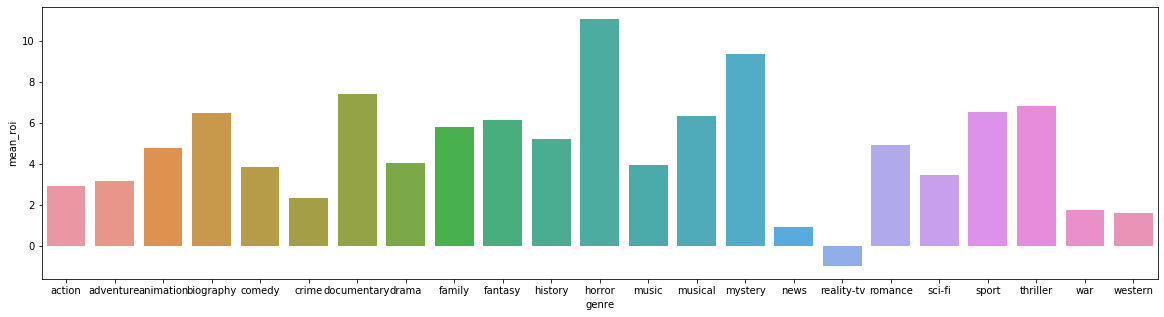

In [449]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
ax = sns.barplot(x="genre", y="mean_roi", data=df_roi_genres)

In [450]:
budget_for_genres = []
for x in list(uniquegenres):
    test6 = df_genres.loc[(df_genres[x]==1)].mean()
    budget_for_genres.append(test6.production_budget)

In [451]:
df_budget_genres = pd.DataFrame(list(zip(list(uniquegenres), budget_for_genres)), columns =['genre', 'mean_budget']).sort_values(by=['genre'])

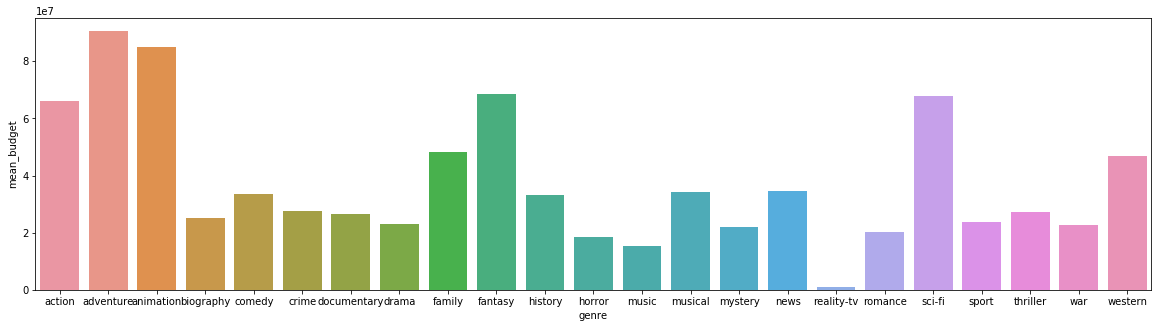

In [452]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
ax = sns.barplot(x="genre", y="mean_budget", data=df_budget_genres)

In [453]:
qroi_budget_grouped = """ SELECT * 
         FROM df_budget_genres
         JOIN df_roi_genres
         USING (genre)"""
df_roi_budget_grouped = pysqldf(qroi_budget_grouped)

In [454]:
df_roi_budget_grouped

,genre,mean_budget,mean_roi
0,action,6.610329e+07,2.905738
1,adventure,9.060648e+07,3.173709
2,animation,8.502455e+07,4.799916
3,biography,2.527752e+07,6.503581
4,comedy,3.369337e+07,3.861838
5,crime,2.759006e+07,2.348752
6,documentary,2.639833e+07,7.429537
7,drama,2.307572e+07,4.038553
8,family,4.822313e+07,5.826521
9,fantasy,6.846661e+07,6.142213


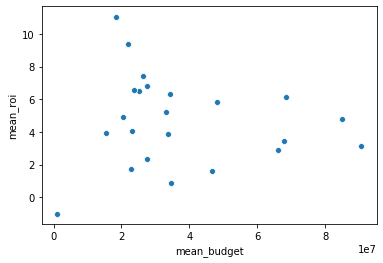

In [455]:
ax = sns.scatterplot(x="mean_budget", y="mean_roi", data=df_roi_budget_grouped)

In [47]:
#ideas, isin() function, str.contains(''), -> function that makes a unique list of all categories(using split)
#itterrows  -  use that